In [2]:
import pandas as pd  # data frame operations
#import sweetviz as sv  # EDA
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
#import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  #  PLOTTING
from scipy import stats
sns.set(style="darkgrid") # seaborn style
from statsmodels.graphics.mosaicplot import mosaic

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [123]:
flight_base = pd.read_csv("https://raw.githubusercontent.com/itsAmeMario0o/BDA718-PROJECT/master/Data/finalprojectIST718v3.csv", sep=',', error_bad_lines=False)

In [124]:
flight1 = flight_base.copy()
np.shape(flight1)

(129889, 28)

In [4]:
flight1.head()

,Satisfaction,Airline_Status,Age,Gender,Price_Sensitivity,Year_of_First_Flight,No_of_Flights_perAir,%_of_Flight_with_other_Airlines,Type_of_Travel,No._of_other_Loyalty_Cards,Shopping_Amount_at_Airport,Eating_and_Drinking_at_Airport,Class,Day_of_Month,Flight_date,Airline_Code,Airline_Name,Orgin_City,Origin_State,Destination_City,Destination_State,Scheduled_Departure_Hour,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Flight_cancelled,Flight_time_in_minutes,Flight_Distance,Arrival_Delay_greater_5_Mins
0,4.5,Blue,31,Male,1,2007,28,7,Business travel,2,0,75,Business,18,3/18/2014,MQ,EnjoyFlying Air Services,"Madison, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,15,0.0,3.0,No,134.0,821,no
1,4.0,Blue,56,Male,2,2006,41,3,Business travel,0,15,60,Business,11,1/11/2014,MQ,EnjoyFlying Air Services,"Madison, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,11,2.0,5.0,No,120.0,821,no
2,2.5,Blue,21,Female,2,2006,8,7,Personal Travel,0,0,135,Business,25,1/25/2014,MQ,EnjoyFlying Air Services,"Milwaukee, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,12,34.0,14.0,No,122.0,853,yes
3,4.0,Blue,43,Male,1,2007,9,9,Business travel,2,10,45,Eco,20,2/20/2014,MQ,EnjoyFlying Air Services,"Madison, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,11,26.0,39.0,No,141.0,821,yes
4,5.0,Silver,49,Male,1,2006,14,10,Business travel,0,8,26,Eco,25,2/25/2014,MQ,EnjoyFlying Air Services,"Milwaukee, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,12,0.0,0.0,No,144.0,853,no


In [5]:
flight1.dtypes

Satisfaction                       float64
Airline_Status                      object
Age                                  int64
Gender                              object
Price_Sensitivity                    int64
Year_of_First_Flight                 int64
No_of_Flights_perAir                 int64
%_of_Flight_with_other_Airlines      int64
Type_of_Travel                      object
No._of_other_Loyalty_Cards           int64
Shopping_Amount_at_Airport           int64
Eating_and_Drinking_at_Airport       int64
Class                               object
Day_of_Month                         int64
Flight_date                         object
Airline_Code                        object
Airline_Name                        object
Orgin_City                          object
Origin_State                        object
Destination_City                    object
Destination_State                   object
Scheduled_Departure_Hour             int64
Departure_Delay_in_Minutes         float64
Arrival_Del

In [125]:
flight1.Satisfaction = flight1.Satisfaction.astype(int)
flight1.Satisfaction = flight1.Satisfaction.astype(int)

In [126]:
flight2 = pd.get_dummies(flight1, columns=['Departure_Delay_in_Minutes',	'Arrival_Delay_in_Minutes',	'Flight_cancelled'	,'Flight_time_in_minutes'	,'Flight_Distance',	'Arrival_Delay_greater_5_Mins','Day_of_Month',	'Destination_City',	'Destination_State',	'Scheduled_Departure_Hour', 'Airline_Code', 'Airline_Name','Orgin_City', 'Origin_State',  'Airline_Status', 'Gender','Price_Sensitivity', 'Year_of_First_Flight', 'No_of_Flights_perAir', '%_of_Flight_with_other_Airlines',	'No._of_other_Loyalty_Cards', 'Shopping_Amount_at_Airport', 'Eating_and_Drinking_at_Airport','Flight_date','Type_of_Travel','Class'])


In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [ ]:
#flight1.dtypes

In [ ]:
#flight1.head()

In [127]:
flight1.dropna(inplace=True)

In [128]:
X = flight2.drop('Satisfaction', axis=1)
y = flight2['Satisfaction']

In [129]:
from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=43)

In [11]:
import numpy as np
from numpy import linalg
import scipy.io as spio
import matplotlib.pyplot as plt


In [12]:
import numpy as np
import cvxopt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
flight2.shape

(129889, 4633)

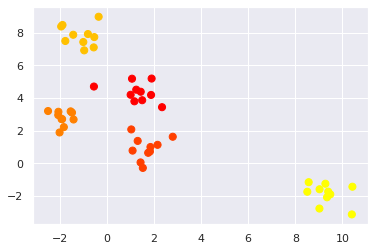

In [15]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=5,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [16]:
#https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
from sklearn.svm import SVC

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_test, y_test)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
y_pred = svclassifier.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 152    0    1    1    0]
 [   2 1033   52   34    0]
 [   9   59 1486  289    7]
 [   1   32  123 2562   24]
 [   1    5   11   91  520]]
              precision    recall  f1-score   support

           1       0.92      0.99      0.95       154
           2       0.91      0.92      0.92      1121
           3       0.89      0.80      0.84      1850
           4       0.86      0.93      0.90      2742
           5       0.94      0.83      0.88       628

    accuracy                           0.89      6495
   macro avg       0.91      0.89      0.90      6495
weighted avg       0.89      0.89      0.88      6495

